# GTZAN Image Classification Baselines and Experiments

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from PIL import Image
import io
import os
import IPython.display as ipd

import librosa
import librosa.display

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('INFO')


Note:
Portions of this notebook were ran in Google Colab, while other portions were ran in Jupyter Notebooks. This was due to GPU issues and to maximize processing time.

## Machine Learning on the Spectograms

The following code was run through Google Colab.

### Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Directory
root_dir = '/content/drive/MyDrive/images_original'

# Import necessary libraries
import os
import numpy as np
from PIL import Image

# Import the data
image_data = []
labels = []

for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(folder_path, image_file)
                image = Image.open(image_path)
                # image = image.resize((width, height))  # Resize if needed
                image_array = np.array(image)
                image_data.append(image_array)
                labels.append(folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Prepare the Data

In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(np.array(image_data).astype('uint8'), labels, test_size=0.2)

In [ ]:
# Normalize the pixel values
#X_train = X_train / 255.0
#X_test = X_test / 255.0

# Create and fit the label encoder
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

label_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
               'jazz', 'metal', 'pop', 'reggae', 'rock']

# Shuffle the training data
np.random.seed(0)
indices = np.arange(X_train.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train = X_train[shuffled_indices]
Y_train = Y_train[shuffled_indices]

### View Images

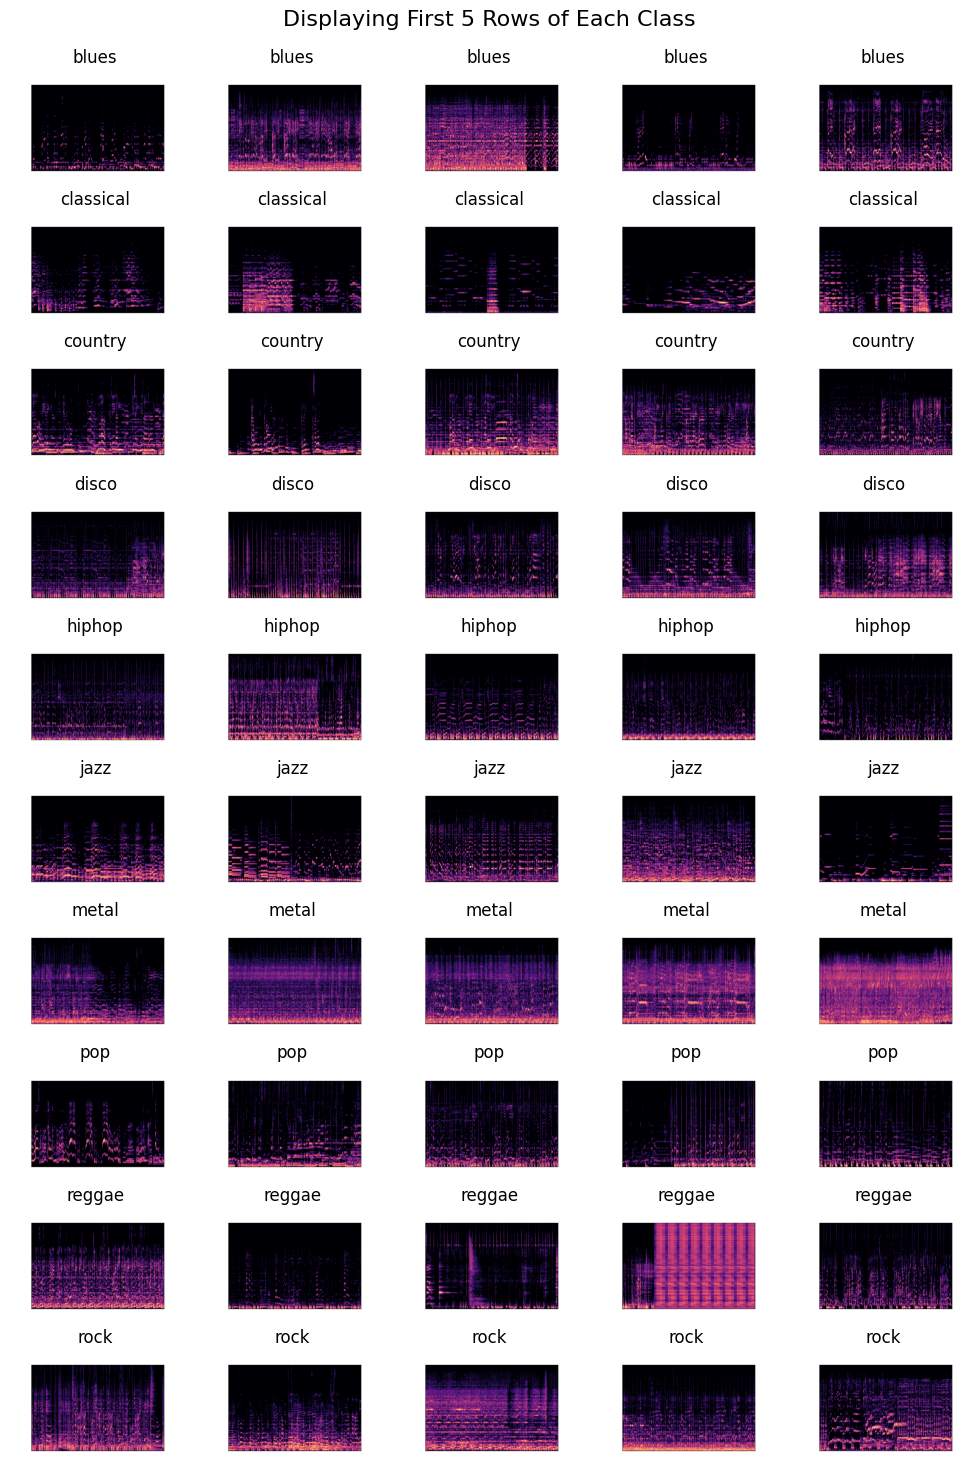

In [ ]:
# Set nrows and ncols
nrows = 10
ncols = 5

# Create subplot
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

# Title label
fig.suptitle("Displaying First 5 Rows of Each Class\n", fontsize=16)

# Loop for displaying each
# Create a figure with subplots. This returns a list of object handles in axs
# which we can use to populate the plots.
for j in range(nrows):
    for i in range(ncols):
        image = X_train[Y_train == j][i]
        label = Y_train[Y_train == j][i]
        label_name = label_names[label]
        axs[j, i].set_title(label_name, fontsize=12)
        axs[j, i].imshow(image)
        axs[j, i].axis('off')

# Formatting and display
plt.tight_layout()
plt.show()

## Run the Models

### KNN

In [ ]:
# Reshape
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn.fit(X_train_flattened, Y_train)
y_pred = knn.predict(X_test_flattened)
knn_accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy for KNN Model (Spectrogram Classification): {knn_accuracy}")

Accuracy for KNN Model (Spectrogram Classification): 0.305


### Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_flattened, Y_train)
y_pred = clf.predict(X_test_flattened)
tree_accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy for Tree Model(Spectrogram Classification): {tree_accuracy}")

Accuracy for Tree Model(Spectrogram Classification): 0.295


### Logistic Regression

In [ ]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lg.fit(X_train_flattened, Y_train)
y_pred = lg.predict(X_test_flattened)
lg_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
print(f"Accuracy for Tree Model(Spectrogram Classification): {lg_accuracy}")

Accuracy for Tree Model(Spectrogram Classification): 0.53


###  Random Forest

In [ ]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train_flattened, Y_train)
y_pred = rforest.predict(X_test_flattened)
rforest_accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy for Random Forest(Spectrogram Classification): {rforest_accuracy}")

Accuracy for Random Forest(Spectrogram Classification): 0.525


## Evaluations

In [ ]:
# Plot the confusion matrix
def plot_confusion_matrix(model):
    preds = model.predict(X_test_flattened)
    confusion = confusion_matrix(Y_test, preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

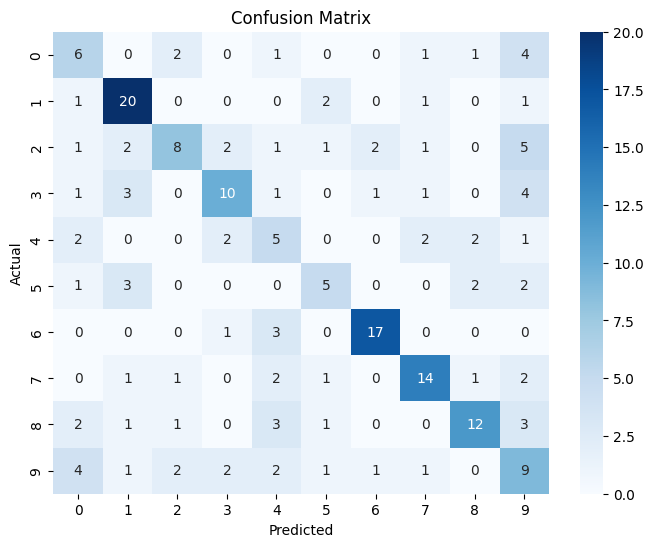

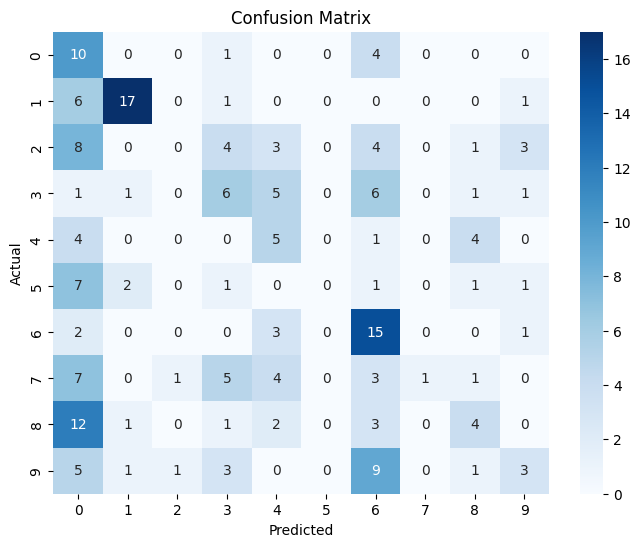

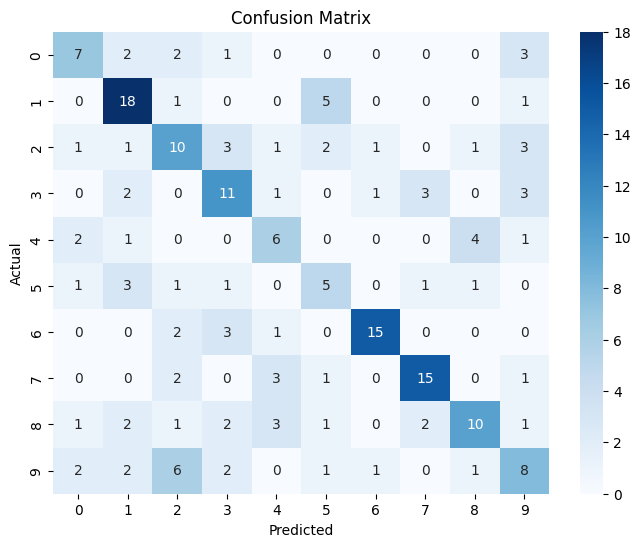

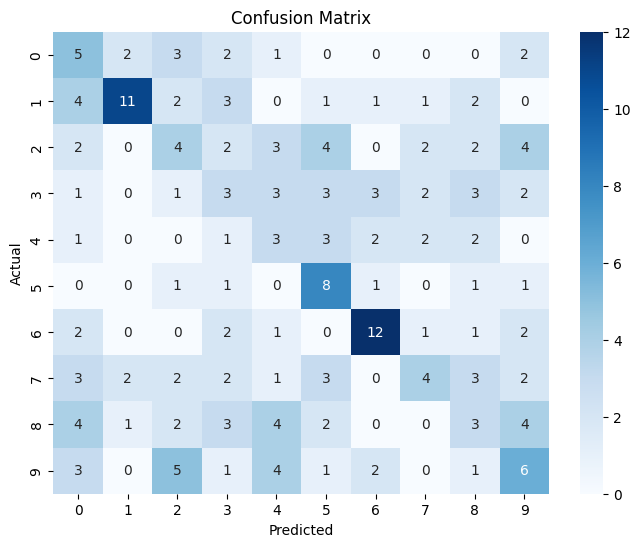

In [ ]:
# Logistic Regression
plot_confusion_matrix(lg)

# KNN
plot_confusion_matrix(knn)

# Random Forest
plot_confusion_matrix(rforest)

# Tree
plot_confusion_matrix(clf)

In [ ]:
# Precision and Recall for Evaluation
def calculate_precision_recall(model, X, y, title='Default'):
    # Make predictions using the model
    y_pred = model.predict(X)

    # Calculate precision and recall
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')

    print(title)
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}\n')

# Look into 'macro', 'micro' and 'weighted' options

In [ ]:
# Random Forest
calculate_precision_recall(rforest, X_test_flattened, Y_test, "Logistic Regression")

# KNN
calculate_precision_recall(knn, X_test_flattened, Y_test, "KNN")

# Logistic Regression
calculate_precision_recall(lg, X_test_flattened, Y_test, "Random Forest")

# Tree
calculate_precision_recall(clf, X_test_flattened, Y_test, "Tree")

Logistic Regression
Precision: 0.52090
Recall: 0.51372

KNN
Precision: 0.33678
Recall: 0.30536

Random Forest
Precision: 0.53037
Recall: 0.51247

Neural Nets
Precision: 0.30398
Recall: 0.30643



## Experiments Using Random Forest - GridSearchCV

Fine-tuning the hyperparameters to improve the accuracy.

In [ ]:
# Define the RandomForestClassifier with initial parameters
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20],
}

# Create a GridSearchCV object with RandomForestClassifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_flattened, Y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create a new RandomForestClassifier with the best parameters
best_rforest = RandomForestClassifier(**best_params, random_state=0)

# Fit the best model to the training data
best_rforest.fit(X_train_flattened, Y_train)

# Make predictions on the test data
y_pred = best_rforest.predict(X_test_flattened)

# Calculate accuracy
best_rforest_accuracy = accuracy_score(Y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy for Random Forest (Spectrogram Classification): {best_rforest_accuracy}")


Best Parameters: {'max_depth': 20, 'n_estimators': 1000}
Accuracy for Random Forest (Spectrogram Classification): 0.495


## CNN

Source for walkthrough and code: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

### Preprocessing

In [ ]:
IMAGE_SIZE = (288, 432)
CONTRAST_FACTOR = 3
DELTA = 0.3

### image transformation on training and test data ###
###################################################################
# image resize
X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
X_test = tf.image.resize(X_test, size=IMAGE_SIZE)

### image augmentation on training data ###
###########################################
# adjust brightness
X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

# adjust contrast
X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

# random flip
X_train_augm = tf.image.random_flip_left_right(X_train_augm)

# concatenate original X_train and augmented X_train data
X_train = tf.concat([X_train, X_train_augm],axis=0)

# concatenate Y_train (note the label is preserved)
Y_train_augm = Y_train
Y_train = tf.concat([Y_train, Y_train_augm],axis=0)

# shuffle X_train and Y_train, i.e., shuffle two tensors in the same order
shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
X_train = tf.gather(X_train, shuffle)
Y_train = tf.gather(Y_train, shuffle).numpy() #also transforms Y_train to numpy array

In [ ]:
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {Y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {Y_test.shape}")

X_train shape (1598, 288, 432, 4)
y_train shape (1598,)
X_test shape (200, 288, 432, 4)
y_test shape (200,)


Print training and testing data examples:


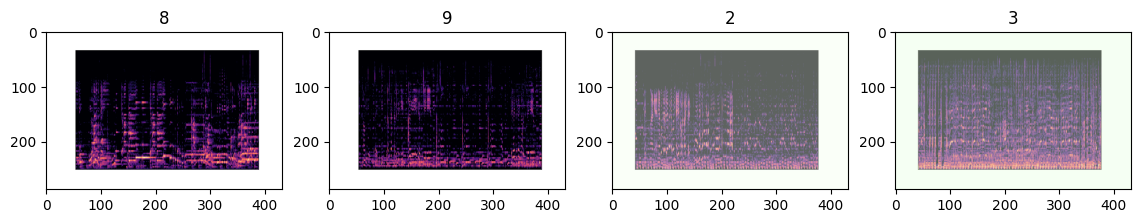

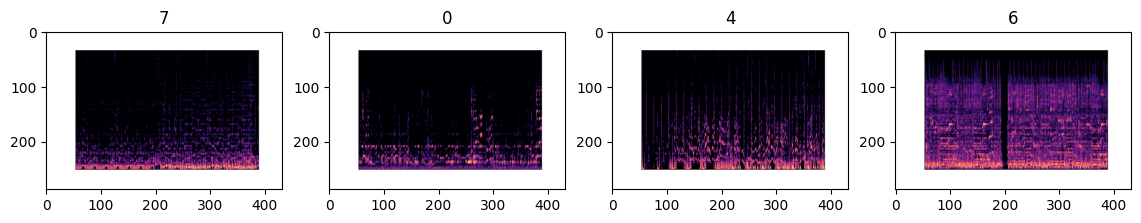

In [ ]:
# Check
# print taining data
print('Print training and testing data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=Y_train[i])

# print test data
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_test[i]))
    axs[i].set(title=Y_test[i])

### Build the model

#### Model 1 - Baseline CNN

In [ ]:
k_size = (3,3)
s_size = (3,3)
p_size = (3,3)

model = tf.keras.Sequential()

# add first convolution layer to the model
model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))

# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size,
    name='pool_1'))

# add second convolutional layer
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    name='conv_2',
    activation='relu'))

# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size, name='pool_2'))

# add a fully connected layer (need to flatten the output of the previous layers first)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=1028,
    name='fc_1',
    activation='relu'))

# add dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.2))

# add the last fully connected layer
# set units=10 for 10 classes, and use 'softmax' activation for multi-class classification
model.add(tf.keras.layers.Dense(
    units=10,
    name='fc_2',
    activation='softmax'))

# build model and print summary
tf.random.set_seed(1)
model.build(input_shape=(None, 288, 432, 4))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 96, 144, 32)       1184      
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 48, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 16, 64)        18496     
                                                                 
 pool_2 (MaxPooling2D)       (None, 3, 5, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 960)               0         
                                                                 
 fc_1 (Dense)                (None, 1028)              987908    
                                                                 
 dropout_4 (Dropout)         (None, 1028)             

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# For validation
X_test_subset = X_test[:150]
Y_test_subset = Y_test[:150]

In [ ]:
# set random seed to get reproductible results
# neural network algorithms are stochastic (e.g., due to random weight initialization); setting a random seed helps to get more stable results after each run
# however, best way to deal with randomness is to repeat your experiment many times (30+) and use statistics to summarize the performance of the model
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_test_subset, Y_test_subset)
)

Epoch 1/10
50/50 [==============================] - 5s 80ms/step - loss: 137.0466 - accuracy: 0.0939 - val_loss: 2.3103 - val_accuracy: 0.0933
Epoch 2/10
50/50 [==============================] - 3s 63ms/step - loss: 2.3033 - accuracy: 0.1026 - val_loss: 2.3154 - val_accuracy: 0.0600
Epoch 3/10
50/50 [==============================] - 4s 87ms/step - loss: 2.3049 - accuracy: 0.0951 - val_loss: 2.3169 - val_accuracy: 0.0600
Epoch 4/10
50/50 [==============================] - 5s 104ms/step - loss: 2.3036 - accuracy: 0.1095 - val_loss: 2.3151 - val_accuracy: 0.0600
Epoch 5/10
50/50 [==============================] - 3s 58ms/step - loss: 2.3030 - accuracy: 0.0914 - val_loss: 2.3168 - val_accuracy: 0.0533
Epoch 6/10
50/50 [==============================] - 3s 58ms/step - loss: 2.3034 - accuracy: 0.1126 - val_loss: 2.3193 - val_accuracy: 0.0600
Epoch 7/10
50/50 [==============================] - 3s 68ms/step - loss: 2.3042 - accuracy: 0.1014 - val_loss: 2.3150 - val_accuracy: 0.0600
Epoch 8/10

In [ ]:
test_results = model.evaluate(X_test, Y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

7/7 [==============================] - 1s 79ms/step - loss: 2.3170 - accuracy: 0.0650

Test Acc. 6.50%


#### Experimentation Notes

Model isn't generalizing well--signs of overfitting with the differences between training accuracy and validation accuracy.

Experiments and changes logged:
- Transformations (contrast, brightness, flip) improved model
- Changing number of neurons assisted with time for training without negatively affecting accuracy
- Lower learning rate improved the model (high rate prevented convergence)
- Adjusting optimizer with Adam showed slightly better improvement
- Adding batch normalization resulted in great improvement to accuracy
- Data augmentation helped profoundly
- More epochs helped
- Increasing pool size improved performance
- Decreasing dropout rate to 0.3 improved performance

In [ ]:
k_size = (5,5)
s_size = (2,2)
p_size = (3,3)

model2 = tf.keras.Sequential()

# add first convolution layer to the model2
model2.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))

# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model2.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size,
    name='pool_1'))

# add second convolutional layer
model2.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    name='conv_2',
    activation='relu'))

# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model2.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size, name='pool_2'))

# add a fully connected layer (need to flatten the output of the previous layers first)
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(
    units=512,
    name='fc_1',
    activation='relu'))

# add batch normalization
model2.add(tf.keras.layers.BatchNormalization())  # Add Batch Normalization

# add dropout layer
model2.add(tf.keras.layers.Dropout(
    rate=0.3))

# add the last fully connected layer
# set units=10 for 10 classes, and use 'softmax' activation for multi-class classification
model2.add(tf.keras.layers.Dense(
    units=10,
    name='fc_2',
    activation='softmax'))

# build model2 and print summary
tf.random.set_seed(1)
model2.build(input_shape=(None, 288, 432, 4))
model2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 144, 216, 32)      3232      
                                                                 
 pool_1 (MaxPooling2D)       (None, 48, 72, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 24, 36, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 12, 64)         0         
                                                                 
 flatten_6 (Flatten)         (None, 6144)              0         
                                                                 
 fc_1 (Dense)                (None, 512)               3146240   
                                                                 
 batch_normalization_2 (Bat  (None, 512)              

In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# set random seed to get reproductible results
# neural network algorithms are stochastic (e.g., due to random weight initialization); setting a random seed helps to get more stable results after each run
# however, best way to deal with randomness is to repeat your experiment many times (30+) and use statistics to summarize the performance of the model
tf.random.set_seed(1234)
np.random.seed(1234)
history = model2.fit(X_train, Y_train,
                    epochs=30,
                    validation_data=(X_test_subset, Y_test_subset)
)

Epoch 1/30
50/50 [==============================] - 7s 75ms/step - loss: 2.1102 - accuracy: 0.2797 - val_loss: 2.8131 - val_accuracy: 0.2400
Epoch 2/30
50/50 [==============================] - 4s 74ms/step - loss: 1.7031 - accuracy: 0.4093 - val_loss: 2.5398 - val_accuracy: 0.3200
Epoch 3/30
50/50 [==============================] - 4s 84ms/step - loss: 1.6077 - accuracy: 0.4380 - val_loss: 2.3658 - val_accuracy: 0.2267
Epoch 4/30
50/50 [==============================] - 3s 64ms/step - loss: 1.4522 - accuracy: 0.5025 - val_loss: 1.9756 - val_accuracy: 0.2667
Epoch 5/30
50/50 [==============================] - 3s 63ms/step - loss: 1.3388 - accuracy: 0.5738 - val_loss: 1.9493 - val_accuracy: 0.3800
Epoch 6/30
50/50 [==============================] - 4s 79ms/step - loss: 1.2270 - accuracy: 0.6189 - val_loss: 2.3750 - val_accuracy: 0.2600
Epoch 7/30
50/50 [==============================] - 4s 79ms/step - loss: 1.1743 - accuracy: 0.6464 - val_loss: 2.5516 - val_accuracy: 0.2867
Epoch 8/30
50

In [ ]:
test_results = model2.evaluate(X_test, Y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

7/7 [==============================] - 0s 42ms/step - loss: 1.0842 - accuracy: 0.6400

Test Acc. 64.00%


## Mel Spectrogram Models

The rest of this notebook was completed through Jupyter Notebooks due to GPU issues in Google Colab.

### Create Mel Spectrograms and Save

Needed to delete jazz.00054 because corrupted file
import glob

path_audio_files = general_path + "/genres_original/"
path_imgs = "./mel_spectrogram_imgs/"

batch_size = 32
hop_length = 512

genre_dict = {"blues":0,"classical":1,"country":2,"disco":3,
             "hiphop":4,"jazz":5,"metal":6,"pop":7,"reggae":8,"rock":9}

print("Transforming the Audio Files into Mel Spectrograms:")

mel_spectogram_data = {}
for genre in genre_dict.keys():
    print("\t",genre)

    mel_spectogram_data[genre] = []

    for name in glob.glob(path_audio_files + genre + "/*"):

        # Deleted jazz054
        data,sampling_rate = librosa.load(name)

        mel_spec = librosa.feature.melspectrogram(y = data.ravel(), sr=sampling_rate,hop_length = hop_length)
        mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

        mel_spectogram_data[genre].append(mel_spec_db)


print("Saving the Mel Spectrogram Images:")

os.mkdir(path_imgs)

for genre in genre_dict.keys():
    print("\t",genre)
    try:
        os.mkdir(path_imgs + genre)
    except:
        pass

    for i in range(len(mel_spectogram_data[genre])):

        fig, ax = plt.subplots(1, figsize=(12,8))

        img = librosa.display.specshow(mel_spectogram_data[genre][i], sr = sampling_rate, hop_length = hop_length,cmap = 'cool',ax=ax)

        fig.savefig(path_imgs + genre + "/" + genre + "_" + str(i) + ".png")

        plt.close()

In [2]:
# Mel spectrograms
# Directory
root_dir = '/Users/hannahgracesmith/Desktop/DS207_final_project/Data/mel_spectrogram_imgs'

# Import the data
image_data = []
labels = []

for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(folder_path, image_file)
                image = Image.open(image_path)
                image = image.resize((432, 288))  # Resize (faster and to keep consistent with spectrograms)
                image_array = np.array(image)
                image_data.append(image_array)
                labels.append(folder)


In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Prepare the Data
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(np.array(image_data).astype('uint8'), labels, test_size=0.2)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Create and fit the label encoder
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

label_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
               'jazz', 'metal', 'pop', 'reggae', 'rock']

# Shuffle the training data
np.random.seed(1)
indices = np.arange(X_train.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train = X_train[shuffled_indices]
Y_train = Y_train[shuffled_indices]

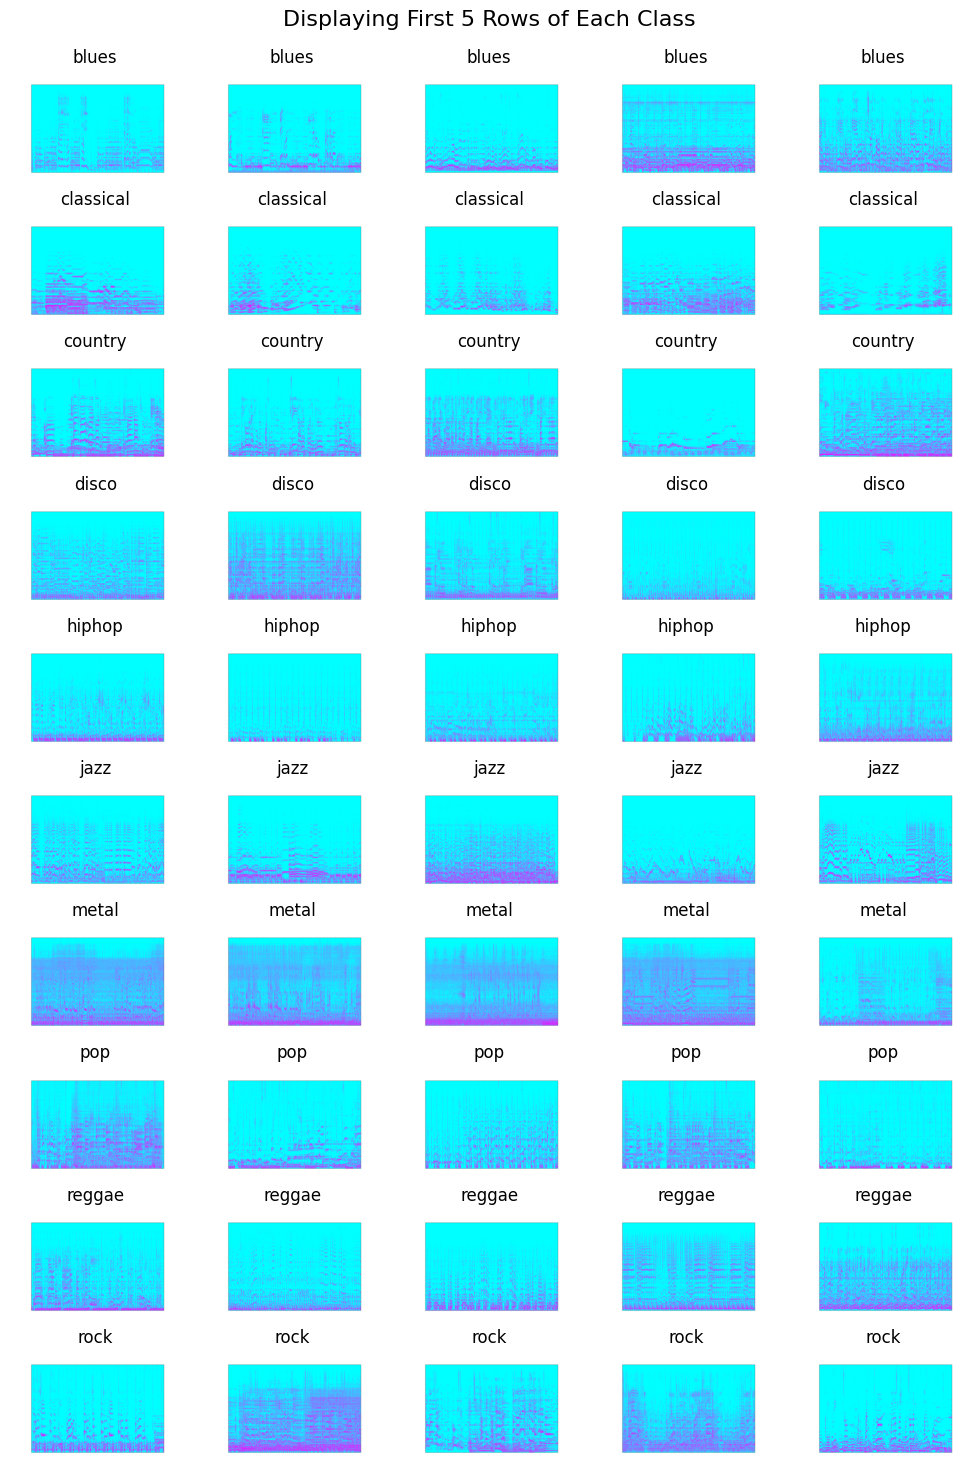

In [ ]:
### View Images
# Set nrows and ncols
nrows = 10
ncols = 5

# Create subplot
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

# Title label
fig.suptitle("Displaying First 5 Rows of Each Class\n", fontsize=16)

# Loop for displaying each
# Create a figure with subplots. This returns a list of object handles in axs
# which we can use to populate the plots.
for j in range(nrows):
    for i in range(ncols):
        image = X_train[Y_train == j][i]
        label = Y_train[Y_train == j][i]
        label_name = label_names[label]
        axs[j, i].set_title(label_name, fontsize=12)
        axs[j, i].imshow(image)
        axs[j, i].axis('off')

# Formatting and display
plt.tight_layout()
plt.show()

### Preprocessing

In [4]:
IMAGE_SIZE = (288, 432)
CONTRAST_FACTOR = 3
DELTA = 0.3

### image transformation on training and test data ###
###################################################################
# image resize
X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
X_test = tf.image.resize(X_test, size=IMAGE_SIZE)

### image augmentation on training data ###
###########################################
# adjust brightness
X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

# adjust contrast
X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

# random flip
X_train_augm = tf.image.random_flip_left_right(X_train_augm)

# concatenate original X_train and augmented X_train data
X_train = tf.concat([X_train, X_train_augm],axis=0)

# concatenate Y_train (note the label is preserved)
Y_train_augm = Y_train
Y_train = tf.concat([Y_train, Y_train_augm],axis=0)

# shuffle X_train and Y_train, i.e., shuffle two tensors in the same order
shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
X_train = tf.gather(X_train, shuffle)
Y_train = tf.gather(Y_train, shuffle).numpy() #also transforms Y_train to numpy array

2023-12-14 09:34:36.524549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {Y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {Y_test.shape}")

X_train shape (1598, 288, 432, 4)
y_train shape (1598,)
X_test shape (200, 288, 432, 4)
y_test shape (200,)


### Build the model

#### Model 3

In [5]:
k_size = (5,5)
s_size = (2,2)
p_size = (3,3)

model3 = tf.keras.Sequential()

# add first convolution layer to the model3
model3.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))

# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model3.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size,
    name='pool_1'))

# add second convolutional layer
model3.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    name='conv_2',
    activation='relu'))

# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model3.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size, name='pool_2'))

# add a fully connected layer (need to flatten the output of the previous layers first)
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(
    units=512,
    name='fc_1',
    activation='relu'))

# add batch normalization
model3.add(tf.keras.layers.BatchNormalization())  # Add Batch Normalization

# add dropout layer
model3.add(tf.keras.layers.Dropout(
    rate=0.3))

# add the last fully connected layer
# set units=10 for 10 classes, and use 'softmax' activation for multi-class classification
model3.add(tf.keras.layers.Dense(
    units=10,
    name='fc_2',
    activation='softmax'))

# build model3 and print summary
tf.random.set_seed(1)
model3.build(input_shape=(None, 288, 432, 4))
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 144, 216, 32)      3232      
                                                                 
 pool_1 (MaxPooling2D)       (None, 48, 72, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 24, 36, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 12, 64)         0         
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 fc_1 (Dense)                (None, 512)               3146240   
                                                                 
 batch_normalization (BatchN  (None, 512)              2

In [6]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [7]:
X_test_subset = X_test[:100]
Y_test_subset = Y_test[:100]

In [8]:
# set random seed to get reproductible results
# neural network algorithms are stochastic (e.g., due to random weight initialization); setting a random seed helps to get more stable results after each run
# however, best way to deal with randomness is to repeat your experiment many times (30+) and use statistics to summarize the performance of the model
tf.random.set_seed(1234)
np.random.seed(1234)
history = model3.fit(X_train, Y_train,
                    epochs=25,
                    validation_data=(X_test_subset, Y_test_subset)
)

Epoch 1/25
50/50 [==============================] - 91s 2s/step - loss: 2.1367 - accuracy: 0.2372 - val_loss: 2.2549 - val_accuracy: 0.1900
Epoch 2/25
50/50 [==============================] - 96s 2s/step - loss: 1.7156 - accuracy: 0.4061 - val_loss: 2.2117 - val_accuracy: 0.1300
Epoch 3/25
50/50 [==============================] - 106s 2s/step - loss: 1.5269 - accuracy: 0.4825 - val_loss: 2.1423 - val_accuracy: 0.2400
Epoch 4/25
50/50 [==============================] - 111s 2s/step - loss: 1.3685 - accuracy: 0.5501 - val_loss: 2.1341 - val_accuracy: 0.3500
Epoch 5/25
50/50 [==============================] - 87s 2s/step - loss: 1.2206 - accuracy: 0.6045 - val_loss: 2.1090 - val_accuracy: 0.2300
Epoch 6/25
50/50 [==============================] - 81s 2s/step - loss: 1.1026 - accuracy: 0.6589 - val_loss: 2.1574 - val_accuracy: 0.2100
Epoch 7/25
50/50 [==============================] - 88s 2s/step - loss: 1.0255 - accuracy: 0.6971 - val_loss: 1.9716 - val_accuracy: 0.3500
Epoch 8/25
50/50 [

In [10]:
test_results = model3.evaluate(X_test, Y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))


7/7 [==============================] - 2s 199ms/step - loss: 1.1040 - accuracy: 0.6450

Test Acc. 64.50%
